In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Loading Dataset

In [3]:
X_Train=pd.read_csv('X_Train.csv')
print(X_Train.shape)
X_Train.head()

(3000, 3)


,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [6]:
X_Test=pd.read_csv('X_Test.csv')
print(X_Test.shape)
X_Test.head()

(1000, 3)


,f1,f2,f3
0,-0.767508,-0.261859,-2.514831
1,-1.241653,1.449001,-0.413089
2,1.925270,1.931761,1.342619
3,-1.298255,1.049761,-0.527319
4,-0.964712,0.938088,-1.186328


In [8]:
Y_Train=pd.read_csv('Y_Train.csv')
print(Y_Train.shape)
print(Y_Train.head())

(3000, 1)
   label
0      1
1      1
2      1
3      0
4      0


##Data Normalisation

In [9]:
x_mean=X_Train.mean(axis=0)
x_std=X_Train.std(axis=0)
#Apply the Transformation
X_train=(X_Train-x_mean)/x_std


#Apply transformation on testing data
X_Test=(X_Test-x_mean)/x_std


In [10]:
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))


def hypothesis(X,theta):
  """
  X-entire array(m,n+1)
  theta- np.array(n+1,1)
  """
  return sigmoid(np.dot(X,theta))

def error(X,y,theta):
  """
  params
  X-(m,n+1)
  Y-(m,1)
  theta-(n+1,1)

  return:
    scale_value=loss
  """
  hi=hypothesis(X,theta)
  e=-1*np.mean((y*np.log(hi)+((1-y)*np.log(1-hi))))
  return e

In [11]:
def gradient(X,y,theta):
  """
  params
  X-(m,n+1)
  Y-(m,1)
  theta-(n+1,1)

  return:
    gradient_vector - (n+1,1)
  """
  hi=hypothesis(X,theta)
  grad=-np.dot(X.T,(y-hi))
  m=X.shape[0]
  return grad/m


def gradient_descent(X,y,lr=0.1,max_itr=500):
  n=X.shape[1]
  theta=np.zeros((n,1))
  print(theta.shape)
  error_list=[]

  for i in range(max_itr):
    err=error(X,y,theta)
    error_list.append(err)
    grad=gradient(X,y,theta)

    theta=theta-lr*grad
    #print(theta.shape)

  return (theta,error_list)


In [12]:
ones=np.ones((X_train.shape[0],1))
X_New_train = np.hstack((ones,X_train))
print(X_New_train.shape)
print(X_New_train)

(3000, 4)
[[ 1.         -0.93455727 -0.24435621 -0.46132724]
 [ 1.         -0.78217091 -0.19324065 -1.08568474]
 [ 1.         -0.46699268  0.56671625 -1.17515175]
 ...
 [ 1.          0.06058085  0.62460396 -1.83796701]
 [ 1.          1.13759    -0.13678922  1.2201323 ]
 [ 1.         -0.74000672 -0.42519048 -1.29706993]]


In [14]:
theta,error_list=gradient_descent(X_New_train,Y_Train)

(4, 1)


array([[-0.3476416 ],
       [-2.54088671],
       [ 1.38267114],
       [-2.30279121]])

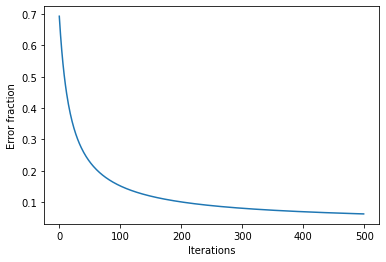

In [24]:
plt.plot(error_list)
plt.xlabel("Iterations")
plt.ylabel("Error fraction")
theta

In [25]:
def predict(X,theta):
  h=hypothesis(X,theta)
  output=np.zeros(h.shape)
  output[h>0.5]=1;
  output=output.astype('int')
  return output

In [35]:
X_Test.shape

(1000, 3)

In [49]:
X_Test.iloc[0]
curr=np.hstack([1,X_Test.iloc[0]])
curr.shape

(4,)

In [57]:
np.hstack([1,X_Test.iloc[0]])

array([ 1.        , -0.58087043, -1.23176447, -2.10351105])

In [53]:
Y_pred=np.zeros(X_Test.shape[0])
Y_pred.shape

(1000,)

In [63]:
#Finding for Test Dataset
i=0
while(i< X_Test.shape[0]):
  curr=np.hstack([1,X_Test.iloc[i]])
  Y_pred[i]=predict(curr,theta)
  i=i+1

In [66]:
print("The predicted Data and chemical is :")
k=pd.DataFrame(Y_pred)
df=pd.concat([X_Test,k],axis=1)
df.columns=["f0","f1","f2","Chemical No"]
df

The predicted Data and chemical is :


,f0,f1,f2,Chemical No
0,-0.580870,-1.231764,-2.103511,1.0
1,-0.936265,0.439238,-0.365899,1.0
2,1.437495,0.910750,1.085630,0.0
3,-0.978691,0.049299,-0.460339,1.0
4,-0.728684,-0.059772,-1.005173,1.0
...,...,...,...,...
995,2.151208,1.997043,1.884533,0.0
996,2.339625,2.066505,1.510322,0.0
997,-0.895277,-0.050729,-0.674522,1.0
998,-0.404589,0.826177,-0.845794,1.0


In [69]:
from google.colab import files
df.to_csv('SelfBuiltResult.csv')
files.download('SelfBuiltResult.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>